Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos. Adaptado de Francisco Aparecido Rodrigues.

Vamos realizar a classificação em um conjunto de dados artificiais.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
import sklearn.datasets as skdata
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

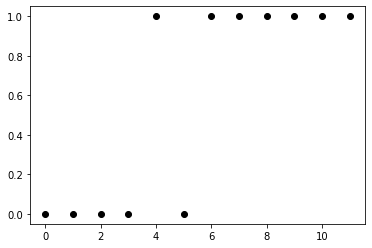

In [2]:
X = np.arange(12).reshape(-1, 1) # atributos
y = np.array([0, 0, 0, 0,1,0, 1, 1, 1, 1, 1, 1]) # classes
plt.plot(X, y, 'ko')
# 1 para fradadores e 0 para honestos

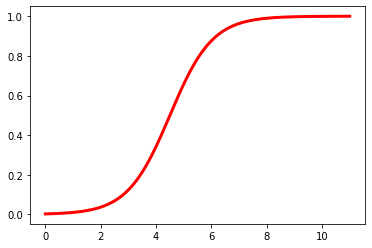

In [3]:
# Podemos obter uma curva mais suave
# Ajusta o modelo de regressao logistica
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)
xx = np.arange(min(X), max(X), 0.01)
loss = expit(xx * model.coef_ + model.intercept_).ravel()
plt.plot(xx, loss, color='red', linewidth=3)

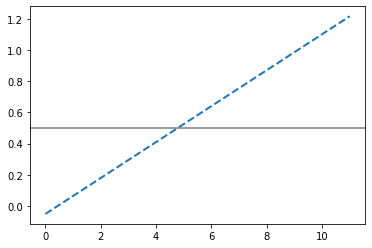

In [4]:
# Ajusta um modelo de regressao linear Y = 𝛃0 + 𝛃1x1 + 𝛃2x2 + … + 𝛃dxd
linear = linear_model.LinearRegression()
linear.fit(X, y)
plt.plot(X, linear.coef_ * X + linear.intercept_, linewidth=2, linestyle='dashed')
plt.axhline(.5, color='.5')
plt.savefig('logistic.eps')
plt.show(True)

Usamos o código abaixo para fazer a classificação completa.

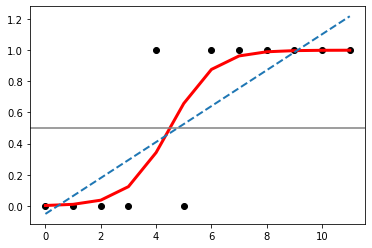

Acurácia: 0.8333333333333334


In [5]:
X = np.arange(12).reshape(-1, 1)
y = np.array([0, 0, 0, 0,1,0, 1, 1, 1, 1, 1, 1])
plt.plot(X, y, 'ko')

# Ajusta o modelo de regressao logistica
model = linear_model.LogisticRegression(C=1e5)
model.fit(X, y)
# X multiplicado por beta 1 a beta d, soma com o beta 0. 
loss = expit(X * model.coef_ + model.intercept_).ravel()
plt.plot(X, loss, color='red', linewidth=3)

# Para comparar, ajustamos um modelo de regressao linear
linear = linear_model.LinearRegression()
linear.fit(X, y)
plt.plot(X, linear.coef_ * X + linear.intercept_, linewidth=2, linestyle='dashed')
plt.axhline(.5, color='.5')
plt.show(True)

p = model.predict_proba(X)
print("Acurácia:", model.score(X, y))

## Classificação de dados 

Vamos inicialmente ler os dados.

In [6]:
import random
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('/content/vertebralcolumn-3C.csv', header=(0))
#data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data

Número de linhas e colunas na matriz de atributos: (310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


Convertendo para o formato Numpy e normalizando:

In [7]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [8]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.8548387096774194


## Região de separação

Bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/

Uma propriedade importante da regressão logística é que a superfície de separação são hiperplanos (retas em duas dimensões, ou planos, em duas dimensões). 

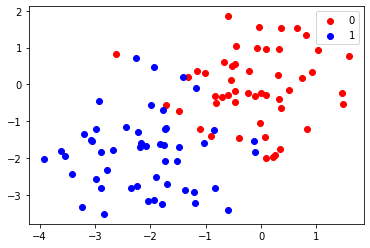

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


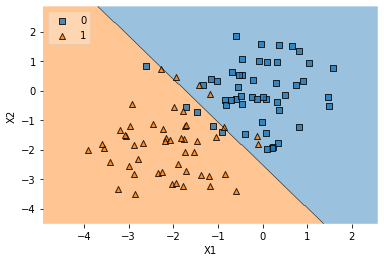

In [10]:
from mlxtend.plotting import plot_decision_regions

# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
#centers = [(0, 0), (-2, -2), (2,0)]
centers = [(0, 0), (-2, -2)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

Para três classes:

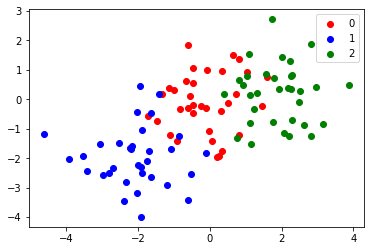

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


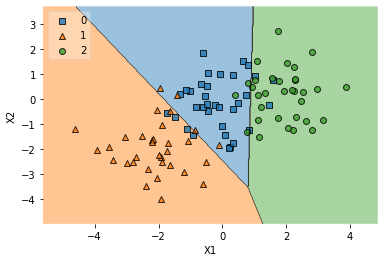

In [11]:
# Gera os dados em duas dimensões
n_samples = 100 # número de observações
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()